This notebook demonstrates linear regression in TensorFlow, and visualizes the graph and summary data for the variables in TensorBoard. Uncomment code where instructed to learn more as you go along.

In [2]:
!pip install pillow

    100% |################################| 5.8MB 198kB/s eta 0:00:01
    100% |################################| 81kB 9.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for olefile ... done
  Stored in directory: /root/.cache/pip/wheels/20/58/49/cc7bd00345397059149a10b0259ef38b867935ea2ecff99a9b
Successfully built olefile


In [1]:
# The next three imports help with compatability between
# Python 2 and 3
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import pylab
import tensorflow as tf

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook
%matplotlib inline

In [127]:
# This is a directory we'll use to store information
# about the graph to later visualize in TensorBoard.
# By default, it will be created in the same directory
# as this notebook. 

# Be sure to delete the contents of this directory before
# running the script.
LOGDIR = './graphs'

In [241]:
tf.reset_default_graph()
sess = tf.Session()

This function will create a noisy dataset that's roughly linear, according to the equation *y = mx + b + noise*

In [242]:

data = np.genfromtxt("/shared/ex1data1.txt", delimiter=',')
x_train =  data[:,0]
y_train =  data[:,1]
# m = len(y_train)

#pylab.plot(X, y, 'g.')
#ax = data.plot.scatter(0,1, color='green')


Plot our training and testing data 

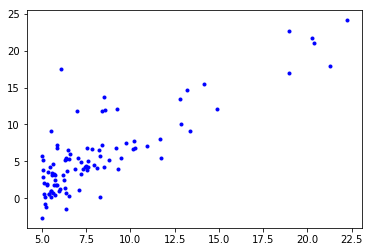

In [243]:
# Uncomment the following lines to plot the data.
pylab.plot(x_train, y_train, 'b.')
#pylab.plot(x_test, y_test, 'g.')

Step 2) Define placeholders for data we'll later input to the graph.

In [244]:
# tf.name_scope is used to make a graph legible in the TensorBoard graph explorer
# shape=[None] means x_placeholder is a one dimensional array of any length. 
# name='x' gives TensorBoard a display name for this node.
with tf.name_scope('input'):
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')

In [245]:
# Uncomment the following lines to see what x_placeholder and y_placeholder are.
print(x_placeholder)
print(y_placeholder)

Tensor("input/x-input:0", shape=(?,), dtype=float32)
Tensor("input/y-input:0", shape=(?,), dtype=float32)


Step 3) Define our model.

Here, we'll use a linear model: *y = mx + b*

In [246]:
help(tf.random_normal)

Help on function random_normal in module tensorflow.python.ops.random_ops:

random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
    Outputs random values from a normal distribution.
    
    Args:
      shape: A 1-D integer Tensor or Python array. The shape of the output tensor.
      mean: A 0-D Tensor or Python value of type `dtype`. The mean of the normal
        distribution.
      stddev: A 0-D Tensor or Python value of type `dtype`. The standard deviation
        of the normal distribution.
      dtype: The type of the output.
      seed: A Python integer. Used to create a random seed for the distribution.
        See
        @{tf.set_random_seed}
        for behavior.
      name: A name for the operation (optional).
    
    Returns:
      A tensor of the specified shape filled with random normal values.



In [247]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    # This is the same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
    y = m * x_placeholder + b

In [248]:
# Uncomment the following lines to see what m, b, and y are
print(m)
print(b)
print(y)

<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'model/b:0' shape=(1,) dtype=float32_ref>
Tensor("model/add:0", shape=(?,), dtype=float32)


In [249]:
m

<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>

Step 4) Define a loss function (here, squared error) and an optimizer (here, gradient descent).

In [250]:
LEARNING_RATE = 0.01

with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss) 

In [251]:
# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train_step:", train)

loss: Tensor("training/loss/Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7f04801138d0>
train_step: name: "training/optimizer/GradientDescent"
op: "NoOp"
input: "^training/optimizer/GradientDescent/update_model/m/ApplyGradientDescent"
input: "^training/optimizer/GradientDescent/update_model/b/ApplyGradientDescent"



Step 5) Set up TensorBoard

In [252]:
# Write the graph
writer = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors (for TensorBoard visualization)
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

# This op will calculate our summary data when run
summary_op = tf.summary.merge_all()

Step 6) Initialize variables

At this point, our graph is complete. We're now ready to initialize variables, then begin training.

In [253]:
sess.run(tf.global_variables_initializer())

Step 7) Training

0 [array([ 2.11823702], dtype=float32), array([-0.88139218], dtype=float32)]
100 [array([ 0.99055535], dtype=float32), array([-1.88028574], dtype=float32)]
200 [array([ 1.05193472], dtype=float32), array([-2.49126339], dtype=float32)]
300 [array([ 1.09470737], dtype=float32), array([-2.91702867], dtype=float32)]
400 [array([ 1.12451398], dtype=float32), array([-3.213727], dtype=float32)]
500 [array([ 1.14528501], dtype=float32), array([-3.42048502], dtype=float32)]
600 [array([ 1.15975964], dtype=float32), array([-3.56456614], dtype=float32)]
700 [array([ 1.16984642], dtype=float32), array([-3.66497159], dtype=float32)]
800 [array([ 1.17687547], dtype=float32), array([-3.73493934], dtype=float32)]
900 [array([ 1.18177354], dtype=float32), array([-3.78369617], dtype=float32)]
1000 [array([ 1.1851871], dtype=float32), array([-3.81767488], dtype=float32)]
1100 [array([ 1.18756568], dtype=float32), array([-3.84135246], dtype=float32)]
1200 [array([ 1.18922329], dtype=float32), array([-3.85

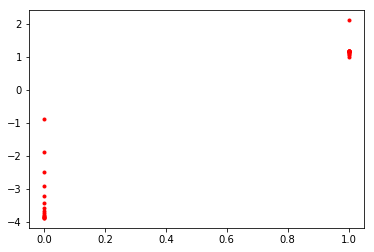

In [254]:
TRAIN_STEPS = 1500

for step in range(TRAIN_STEPS):
    
    # Session will run two ops:
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    # Uncomment the following two lines to watch training happen real time.
    if step % 100 == 0:
        print(step, sess.run([m, b]))
        pylab.plot(sess.run([b, m]), "r.")
    
# close the writer when we're finished using it
writer.close()

Step 8) See the trained values for m and b

In [197]:
print ("m: %f, b: %f" % (sess.run(m), sess.run(b)))

m: 1.190618, b: -3.871738


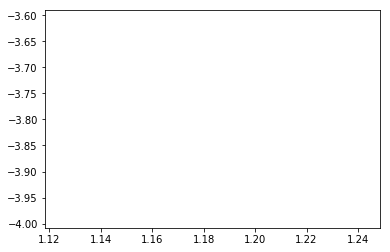

In [161]:
pylab.plot(sess.run(m), sess.run(b))

Step 9) Use the trained model to make a prediction

In [155]:
# Use the trained model to make a prediction!
# Remember that x_placeholder must be a vector, hence [2] not just 2.
# We expect the result to be (about): 2 * 0.1 + 0.3 + noise ~= 0.5
sess.run(y, feed_dict={x_placeholder: [20.54]})

array([ 20.50645256], dtype=float32)

Step 10) Start TensorBoard

In [ ]:
# To start TensorBoard, run this command from a terminal
# Note: you should run this from the same directory that contains this notebook
# or, provide absolute path to the 'graphs' directory
# If you are runnining in a virtualenv, be sure to start it
# if you open a new terminal window.

# $ tensorboard --logdir=graphs

# To open TensorBoard, point your browser to http://localhost:6006
# Then, click on the tabs for 'scalars', 'distributions', 'histograms', and 'graphs'
# to learn more.

# If you run into trouble, delete LOGDIR (to clear information from previous runs),
# then re-run this script, and restart TensorBoard.